# Lets Create Some Random Graphs

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random
import math

In [80]:
'''
Idea: generar un grafo completo. Recorrerlo usando DFS desde un nodo elegido al azar.
Para cada arista que no sea puente, tomar una muestra de una variable aleatoria y eliminar
la arista si la variable supera cierto umbral. A grandes rasgos, el procedimiento consiste
en eliminar cierto porcentaje esperado de backedges.
'''

def sacarBackedges(n, grafo, p_backedge=0.5):
    # Elimina cada backedge de un grafo con una probabilidad 1.0 - p_backedge.
    vecinosYPesos = [ [] for i in range(n) ]

    for e in grafo:
        vecinosYPesos[e[0] - 1].append([ e[1], e[2] ])
        vecinosYPesos[e[1] - 1].append([ e[0], e[2] ])

    color = dict([ (i+1, "blanco") for i in range(n) ])
    backedges = backedgesDFS(vecinosYPesos, color, 1, -1, [])

    for b in backedges:
        p = np.random.uniform()
        if p >= p_backedge:
            grafo.remove(b)
    

def backedgesDFS(vecinosYPesos, color, v, padre, res):
    color[v] = "gris"

    for t in vecinosYPesos[v-1]:
        w = t[0]
        if color[w] == "blanco":
            backedgesDFS(vecinosYPesos, color, w, v, res)
        if color[w] == "gris" and w != v and w != padre:
            l, r = min(v,w), max(v,w)
            res.append([l, r, t[1]])

    color[v] = "negro"

    return res

def generarGrafoSpidermanPesosUniformes(n, l, minimo=0, maximo=10, p_backedge=0.5):
    # n = número de rayos
    # l = número de capas

    grafoSpiderman = []

    # inicializa la primera capa
    for j in range(2, n+2):
        grafoSpiderman.append( [1, j, np.random.randint(minimo, maximo)] )

        if j < n+1:
            grafoSpiderman.append( [j, j+1, np.random.randint(minimo, maximo)] )
        else:
            grafoSpiderman.append( [2, j, np.random.randint(minimo, maximo)] )

    # genera las capas 2 a l
    for i in range(1, l):
        for j in range(2, n+2):
            grafoSpiderman.append( [j + (i-1)*n, j + i*n, np.random.randint(minimo, maximo)] )

            if j < n+1:
                grafoSpiderman.append( [j + i*n, j + i*n + 1, np.random.randint(minimo, maximo)] )
            else:
                grafoSpiderman.append( [2 + i*n, j + i*n, np.random.randint(minimo, maximo)] )

    sacarBackedges(n*l + 1, grafoSpiderman, p_backedge)

    grafoStr = [ " ".join( str(k) for k in e ) for e in grafoSpiderman ]

    return grafoStr

def generarGrafoSpidermanPesosNormales(n, l, mu=5, sigma=1, p_backedge=0.5):
    # n = número de rayos
    # l = número de capas

    grafoSpiderman = []

    # inicializa la primera capa
    for j in range(2, n+2):
        grafoSpiderman.append( [1, j, int(max(np.random.normal(mu, sigma), 0))] )

        if j < n+1:
            grafoSpiderman.append( [j, j+1, int(max(np.random.normal(mu, sigma), 0))] )
        else:
            grafoSpiderman.append( [2, j, int(max(np.random.normal(mu, sigma), 0))] )

    # genera las capas 2 a l
    for i in range(1, l):
        for j in range(2, n+2):
            grafoSpiderman.append( [j + (i-1)*n, j + i*n, int(max(np.random.normal(mu, sigma), 0))] )

            if j < n+1:
                grafoSpiderman.append( [j + i*n, j + i*n + 1, int(max(np.random.normal(mu, sigma), 0))] )
            else:
                grafoSpiderman.append( [2 + i*n, j + i*n, int(max(np.random.normal(mu, sigma), 0))] )

    print(grafoSpiderman)
    sacarBackedges(n*l + 1, grafoSpiderman, p_backedge)
    print(grafoSpiderman)

    grafoStr = [ " ".join( str(k) for k in e ) for e in grafoSpiderman ]

    return grafoStr

def generarGrafoAleatorioPesosUniformes(n, minimo=0, maximo=10, p_backedge=0.5):
    # Genera un grafo completo representado por una lista de aristas.
    # El nodo de menor índice aparece antes, pero los pares no son ordenados
    # (es decir, el grafo no es dirigido).
    grafo = []
    pesoActual = 0
    for i in range(1, n):
        for j in range(i+1, n+1):
            grafo.append( [i, j, np.random.randint(minimo, maximo)] )
            pesoActual += 1

    sacarBackedges(n, grafo, p_backedge)

    grafoStr = [ " ".join( str(k) for k in e ) for e in grafo ]

    return grafoStr

def generarGrafoAleatorioPesosNormales(n, mu=5, sigma=1, p_backedge=0.5):
    # Es necesario que los pesos se correspondan con la cantidad de aristas
    # de un grafo completo de n nodos
#     assert(len(pesos) == n*(n-1) / 2)

    # Genera un grafo completo representado por una lista de aristas.
    # El nodo de menor índice aparece antes, pero los pares no son ordenados
    # (es decir, el grafo no es dirigido).
    grafo = []
    pesoActual = 0
    for i in range(1, n):
        for j in range(i+1, n+1):
            grafo.append( [i, j, int(max(np.random.normal(mu, sigma), 0))] )
            pesoActual += 1

    sacarBackedges(n, grafo, p_backedge)

    grafoStr = [ " ".join( str(k) for k in e ) for e in grafo ]

    return grafoStr

def generarEntradaPesosUniformes(n, minimo=0, maximo=10, p_backedge=0.5, archivo="output"):
    # Genera un caso de test con 50 grafos de 5 a n nodos. Los pesos están distribuidos
    # uniformemente según los parámetros especificados.
    with open(archivo, 'w') as entrada:
        for k in range(5,n+1):
            for i in range(50):
                grafo = generarGrafoAleatorioPesosUniformes(k, minimo, maximo, p_backedge)
                entrada.write(str(k) + " " + str(len(grafo)) + '\n')
                for j in grafo:
                    entrada.write(j + '\n')
        entrada.write("0 0\n")

def generarEntradaPesosNormales(n, mu=5, sigma=1, p_backedge=0.5, archivo="output"):
    # Genera un caso de test con 50 grafos de 5 a n nodos. Los pesos están distribuidos
    # uniformemente según los parámetros especificados.
    with open(archivo, 'w') as entrada:
        for k in range(5,n+1):
            for i in range(200):
                grafo = generarGrafoAleatorioPesosNormales(k, mu, sigma, p_backedge)
                entrada.write(str(k) + " " + str(len(grafo)) + '\n')
                for j in grafo:
                    entrada.write(j + '\n')
        entrada.write("0 0\n")
        
def generarEntradaSpidermanPesosUniformes(n, l, minimo=0, maximo=10, p_backedge=0.5, archivo="output"):
    # Genera un caso de test con 50 grafos de 5 a n nodos. Los pesos están distribuidos
    # uniformemente según los parámetros especificados.
    with open(archivo, 'w') as entrada:
        for k in range(5,n+1):
            for i in range(50):
                grafo = generarGrafoSpidermanPesosUniformes(k, l, minimo, maximo, p_backedge)
                entrada.write(str(k*l+1) + " " + str(len(grafo)) + '\n')
                for j in grafo:
                    entrada.write(j + '\n')
        entrada.write("0 0\n")

def generarEntradaSpidermanPesosNormales(n, l, mu=5, sigma=1, p_backedge=0.5, archivo="output"):
    # Genera un caso de test con 50 grafos de 5 a n nodos. Los pesos están distribuidos
    # uniformemente según los parámetros especificados.
    with open(archivo, 'w') as entrada:
        for k in range(5,n+1):
            for i in range(50):
                grafo = generarGrafoSpidermanPesosNormales(k, l, mu, sigma, p_backedge)
                entrada.write(str(k*l+1) + " " + str(len(grafo)) + '\n')
                for j in grafo:
                    entrada.write(j + '\n')
        entrada.write("0 0\n")


In [81]:
maxNUmberOfNodes = 40

for p_backedges in np.arange(0,1.01,0.25):
    generarEntradaPesosNormales(maxNUmberOfNodes,5,1,p_backedges,"./tests/normales_p_{0}.test-in".format(p_backedges))


# Corremos el experimento

In [93]:
! make expe

In [3]:
results ={}

for p_backedges in np.arange(0,1.01,0.25):
    results["dfNormal_{0}".format(p_backedges)] = pd.read_csv("./experimentacion/normales_p_{0}.stderr".format(p_backedges), delimiter=";")



In [4]:
results["dfNormal_1.0"].head()

,Cantidad de Nodos,Cantidad de Ejes,Tiempo generando Mst,Tiempo calculando raiz
0,5,10,0.000010,0.000009
1,5,10,0.000006,0.000006
2,5,10,0.000005,0.000006
3,5,10,0.000006,0.000006
4,5,10,0.000005,0.000006


In [5]:
for key, value in results.items():
    results[key] = value.groupby("Cantidad de Nodos").mean()
# dfNormal = dfNormal.groupby("Cantidad de Nodos").mean()
results["dfNormal_1.0"]

,Cantidad de Ejes,Tiempo generando Mst,Tiempo calculando raiz
Cantidad de Nodos,,,
5,10,0.000005,0.000006
6,15,0.000007,0.000006
7,21,0.000009,0.000007
8,28,0.000011,0.000007
9,36,0.000014,0.000007
10,45,0.000016,0.000008
11,55,0.000019,0.000008
12,66,0.000022,0.000008
13,78,0.000025,0.000009


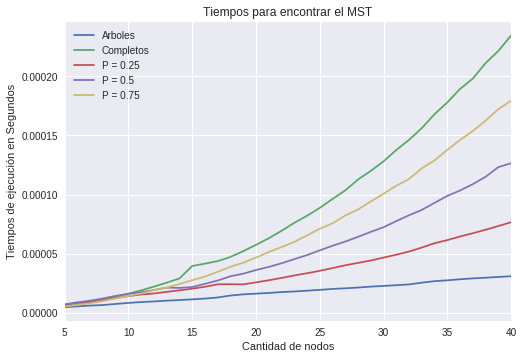

In [6]:
df = pd.DataFrame({'Arboles': results["dfNormal_0.0"]['Tiempo generando Mst'],
                  'P = 0.25': results["dfNormal_0.25"]['Tiempo generando Mst'],
                  'P = 0.5': results["dfNormal_0.5"]['Tiempo generando Mst'],
                  'P = 0.75': results["dfNormal_0.75"]['Tiempo generando Mst'],
                  'Completos': results["dfNormal_1.0"]['Tiempo generando Mst']})

ax = df.plot(logy=False)
ax.set_ylabel("Tiempos de ejecución en Segundos")
ax.set_xlabel("Cantidad de nodos")

plt.title("Tiempos para encontrar el MST")
plt.show()

In [26]:
dfComp = pd.DataFrame()
dfComp['Cantidad de Nodos'] = results["dfNormal_1.0"].index.values
dfComp['Complejidad n^2*log(n)'] = [100 + random.normalvariate(n**2,2) *math.log(n,2) for n in results["dfNormal_0.0"].index.values]
dfComp['Complejidad nlog(n)'] = [100 + random.normalvariate(n,0.1)*math.log(n,2) for n in results["dfNormal_0.0"].index.values]

dfComp['Tiempo en segundos de completos'] =  results["dfNormal_1.0"]['Tiempo generando Mst']
dfComp['Tiempo en segundos de arboles'] =  results["dfNormal_0.0"]['Tiempo generando Mst']
plt.clf()
correlation = dfComp.corr()
correlation

,Cantidad de Nodos,Complejidad n^2*log(n),Complejidad nlog(n),Tiempo en segundos de completos,Tiempo en segundos de arboles
Cantidad de Nodos,1.000000,0.968757,0.998205,0.978757,0.998395
Complejidad n^2*log(n),0.968757,1.000000,0.981518,0.999591,0.980561
Complejidad nlog(n),0.998205,0.981518,1.000000,0.986525,0.997692
Tiempo en segundos de completos,0.978757,0.999591,0.986525,1.000000,0.978272
Tiempo en segundos de arboles,0.998395,0.980561,0.997692,0.978272,1.000000


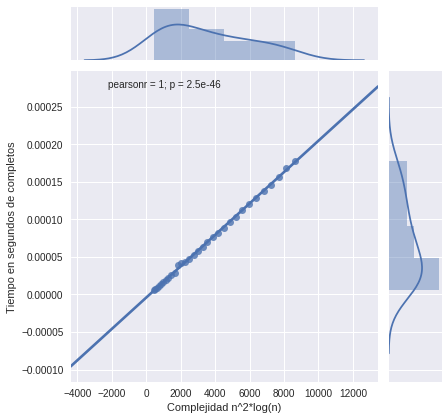

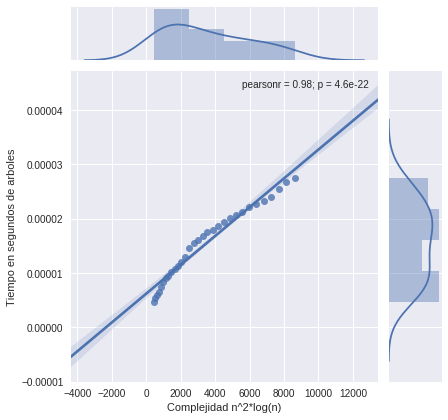

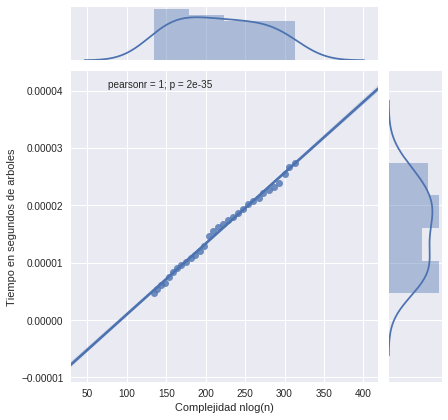

In [27]:
sns.jointplot(dfComp['Complejidad n^2*log(n)'], dfComp['Tiempo en segundos de completos'], kind="reg")
sns.jointplot(dfComp['Complejidad n^2*log(n)'], dfComp['Tiempo en segundos de arboles'], kind="reg")

sns.jointplot(dfComp['Complejidad nlog(n)'], dfComp['Tiempo en segundos de arboles'], kind="reg")


plt.show()

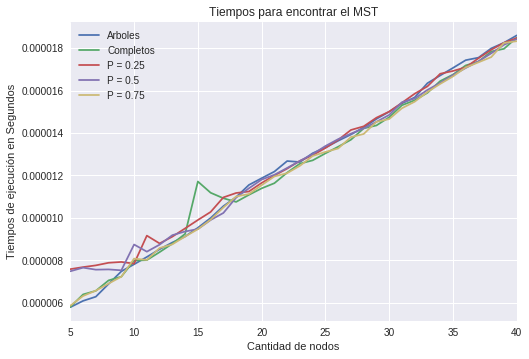

In [28]:
dfRoot = pd.DataFrame({'Arboles': results["dfNormal_0.0"]['Tiempo calculando raiz'],
                  'P = 0.25': results["dfNormal_0.25"]['Tiempo calculando raiz'],
                  'P = 0.5': results["dfNormal_0.5"]['Tiempo calculando raiz'],
                  'P = 0.75': results["dfNormal_0.75"]['Tiempo calculando raiz'],
                  'Completos': results["dfNormal_1.0"]['Tiempo calculando raiz']})

ax = dfRoot.plot(logy=False)
ax.set_ylabel("Tiempos de ejecución en Segundos")
ax.set_xlabel("Cantidad de nodos")

plt.title("Tiempos para encontrar el MST")
plt.show()

In [163]:
dfComp = pd.DataFrame()
dfComp['Cantidad de Nodos'] = results["dfNormal_1.0"].index.values
dfComp['Complejidad n**2'] = [100 + random.normalvariate(n**2,2) for n in results["dfNormal_0.0"].index.values]
dfComp['Complejidad n'] = [100 + random.normalvariate(n,0.3) for n in results["dfNormal_0.0"].index.values]

dfComp['Tiempo de encontrar raiz en segundos de ex-completos'] =  results["dfNormal_1.0"]['Tiempo calculando raiz']
dfComp['Tiempo de encontrar raiz en segundos de arboles'] =  results["dfNormal_0.0"]['Tiempo calculando raiz']
plt.clf()
correlation = dfComp.corr()
correlation

,Cantidad de Nodos,Complejidad n**2,Complejidad n,Tiempo de encontrar raiz en segundos de ex-completos,Tiempo de encontrar raiz en segundos de arboles
Cantidad de Nodos,1.000000,0.979279,0.999670,0.989304,0.998206
Complejidad n**2,0.979279,1.000000,0.978676,0.970244,0.980576
Complejidad n,0.999670,0.978676,1.000000,0.988351,0.997675
Tiempo de encontrar raiz en segundos de ex-completos,0.989304,0.970244,0.988351,1.000000,0.988109
Tiempo de encontrar raiz en segundos de arboles,0.998206,0.980576,0.997675,0.988109,1.000000


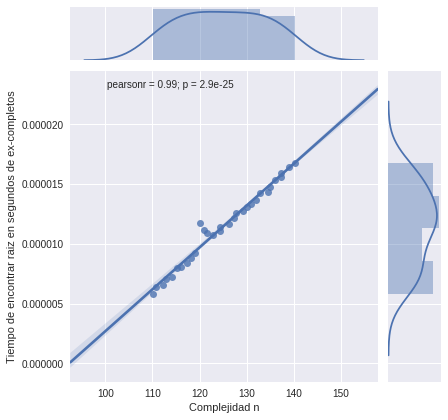

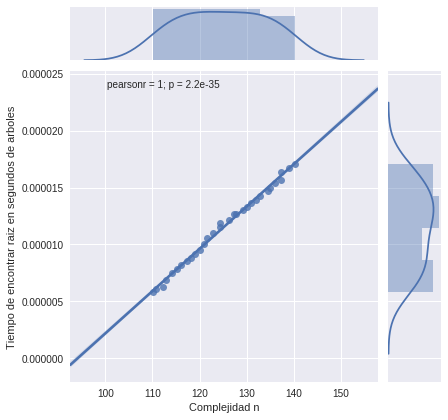

In [168]:
sns.jointplot(dfComp['Complejidad n'], dfComp['Tiempo de encontrar raiz en segundos de ex-completos'], kind="reg")
sns.jointplot(dfComp['Complejidad n'], dfComp['Tiempo de encontrar raiz en segundos de arboles'], kind="reg")

plt.show()